# Analysis of the CaK. line
flare 6/9/2017

Remark that there are two flares here 

# start with flare of 11:55:47 

In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi as un

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


# functies uittesten met CaK

In [3]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s


In [4]:
reload(un)
# And now the running commands
openfile="nb_3950_2019-05-06T08_34_01_scans=0-452_corrected_im.fits"
header= f.getheader(un.get_file_path_fits(openfile))
header = add_enters(str(header), length_row=79)

print(header)
# np.savetxt('headerCaK19.txt', header)

with open('headers/headerCaK19.txt', 'w') as file:
    file.write(header)




SIMPLE  =                    T / Written by IDL:  Thu Nov 14 15:27:18 2019     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1888 / Number of positions along axis 1              
 NAXIS2  =                 1236 / Number of positions along axis 2              
 NAXIS3  =                   28 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  453 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 TIMESYS = 'UTC     '           /                                               
 DATE    = '2019-11-15T11:56:04' / Creation UTC date of FITS header             
 VAR_KEYS= 'VAR-EXT-DATE-BEG;DATE-BEG,VAR-EXT-DATE-END;DATE-END,VAR-EXT-DATE-AV&
'CONTINUE  'G;DATE-AVG,VAR-EX

for the spectral positions of the data: see harps paper! We calculate these here:

In [5]:
peak = 3933.663
D = np.array([-1.00, -0.85, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.07, 0, 0.07, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.85, 1.00, 0 ])
wavl = D+peak
wavl[-1] = 4000
np.save('spectfile3950_.npy', wavl)
wavl, np.shape(wavl)

(array([3932.663, 3932.813, 3933.013, 3933.113, 3933.213, 3933.313,
        3933.413, 3933.513, 3933.593, 3933.663, 3933.733, 3933.813,
        3933.913, 3934.013, 3934.113, 3934.213, 3934.313, 3934.513,
        3934.663, 4000.   ]),
 (20,))

The time series are also not yet given. Calcultate them from: 
START+'2017-09-06T11:56:28.03739' END= '2017-09-06T12:39:22.07020' in units [minutes]

the found wavelengts by solarnet where  [393.219216 393.252048 393.278192 393.304944 393.31148  393.318016
 393.324552 393.330936 393.337472 393.344008 393.350544 393.356928
 393.363464 393.37     393.376536 393.383072 393.389456 393.395992
 393.402528 393.409064 393.415448 393.421984 393.42852  393.435056
 393.461808 393.487952 393.520784 400.114744]


 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


(1236, 1888) (1236, 1888)
Boundary
Blue=Outside, yellow=Inside


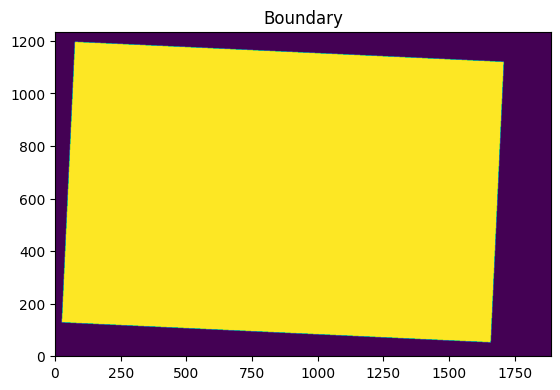

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([3932.19216002, 3932.52048001, 3932.78192001, 3933.04944001,
       3933.11480001, 3933.18016001, 3933.24552001, 3933.30936   ,
       3933.37472   , 3933.44008   , 3933.50544   , 3933.56928   ,
       3933.63464   , 3933.7       , 3933.76536   , 3933.83072   ,
       3933.89456   , 3933.95992   , 3934.02528   , 3934.09064   ,
       3934.15447999, 3934.21983999, 3934.28519999, 3934.35055999,
       3934.61807999, 3934.87951999, 3935.20783998, 4001.14743998])

In [6]:
reload(un)
CaK= un.SST_data('nb_3950_2019-05-06T08_34_01_scans=0-452_corrected_im.fits',
                   'use_solarnet','use_solarnet',name_of_line='CaK19', thresh=[2e-7, 5e-5])
CaK._wavel = CaK._wavel * 10 # which were in nm
CaK.line_lim = (3932.1, 3935.3)
CaK._wavel

[[4.166666666666667, 3.5], [13.5, 3.5], [22.833333333333332, 3.5]] 28


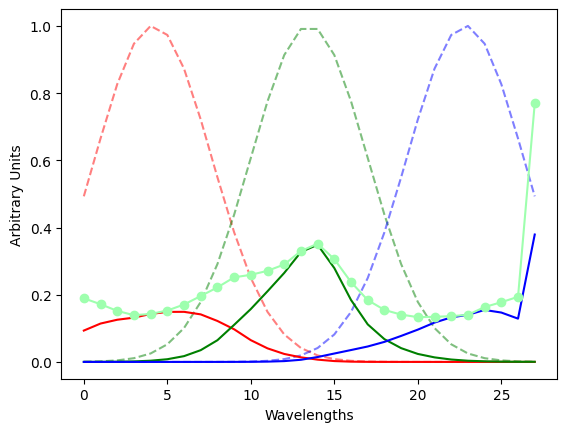

In [7]:
# %matplotlib inline
Meansd = un.guess_filters(len(CaK._wavel))
print(Meansd, len(CaK._wavel))
CaK.update_filters(Meansd)
CaK.plot_filt(880,900)

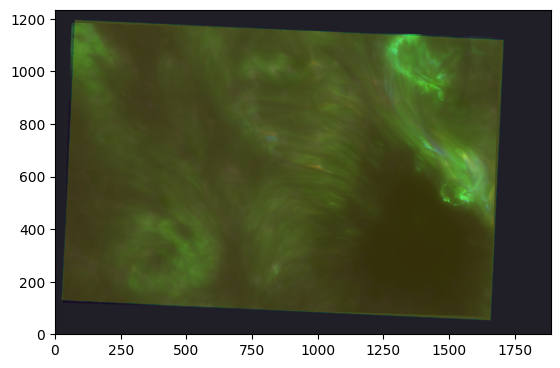

(1236, 1888, 3)


In [8]:
CaK.ccp_frame(70,Show=False)
plt.imshow(CaK.current_ccp,origin='lower')

plt.imshow(CaK.boundary,origin='lower', alpha=0.2)
plt.show()
print(np.shape(CaK.current_ccp))#@,np.shape(CaK.Boundary,origin='lower'))

In [9]:
# # Many COCOPLOTS
# r = CaK._number_of_frames
# for i in range(0,r,80):
#     # try:
#     #     print(CaK._time[i], CaK._time)
#     # except IndexError:
#     #     print(f"the timeframe is not long enough. index {i} out of bounds for time with len {len(CaK._time)}")
#     tstr = CaK.time_of_frame(i)
#     print("COCOPLOT at ", tstr, "(frame number", i,")")
#     CaK.ccp_frame(i,Show=False)
#     plt.imshow(CaK.current_ccp,origin='lower')

#     plt.imshow(CaK.boundary,origin='lower', alpha=0.1)
#     plt.show()


In [10]:
def check_scalar_not_nan(sst_data):
    if hasattr(CaK, 'scalar'):
        if np.isnan(CaK.scalar):
            print('This is a problem. The CaK.scalar is nan.')
            # A scalar which will normalize the intensity
            CaK.scalar = 0
            CaK.scalar = CaK.frame_integrated_spect(0)[0]
            if np.isnan(CaK.scalar):
                print('The problem is not fixed by renormalization.\nMake sure no other constants are nan in the definition of the scalar')
                if hasattr(CaK,'correction'):
                    print('the correction', CaK.correction )

    else:
        CaK.frame_integrated_spect(0)
        CaK.check_scalar_not_nan

check_scalar_not_nan(CaK)

np.shape(CaK.datacube)

(453, 1, 28, 1236, 1888)

[0.86265659 0.7696802  0.6896942  0.6311246  0.63493444 0.66219748
 0.72413896 0.83839256 1.01160102 1.2105086  1.35683116 1.39867789
 1.39056545 1.41106816 1.43953799 1.36388238 1.18022232 0.97144951
 0.80899055 0.70971096 0.65899204 0.63936881 0.63685918 0.64544461
 0.72242417 0.81090818 0.87953304 3.87944881]


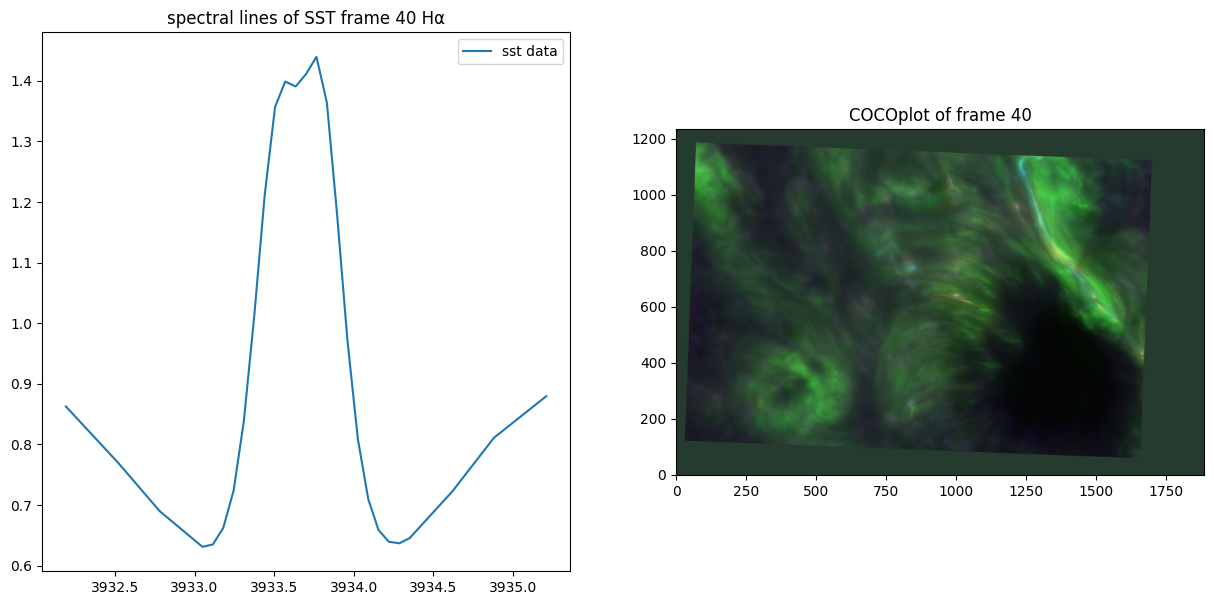

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
CaK.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaK.frame_integrated_spect(frame)
print(CaK.av_spect)
ax[0].plot(CaK._wavel[:-1], CaK.av_spect[:-1], label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

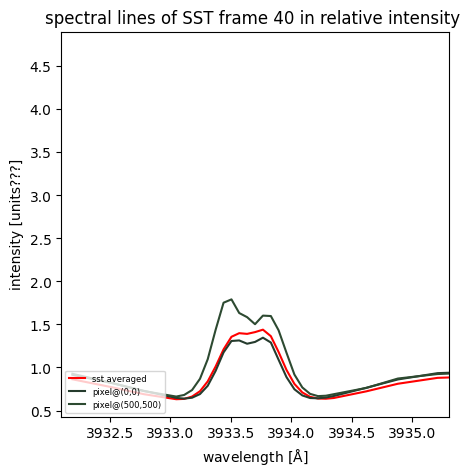

In [12]:
CaK.current_ccp[0:30:10,0:60:20,:]
# CaK.define_point_at_continuum(-1)
CaK.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

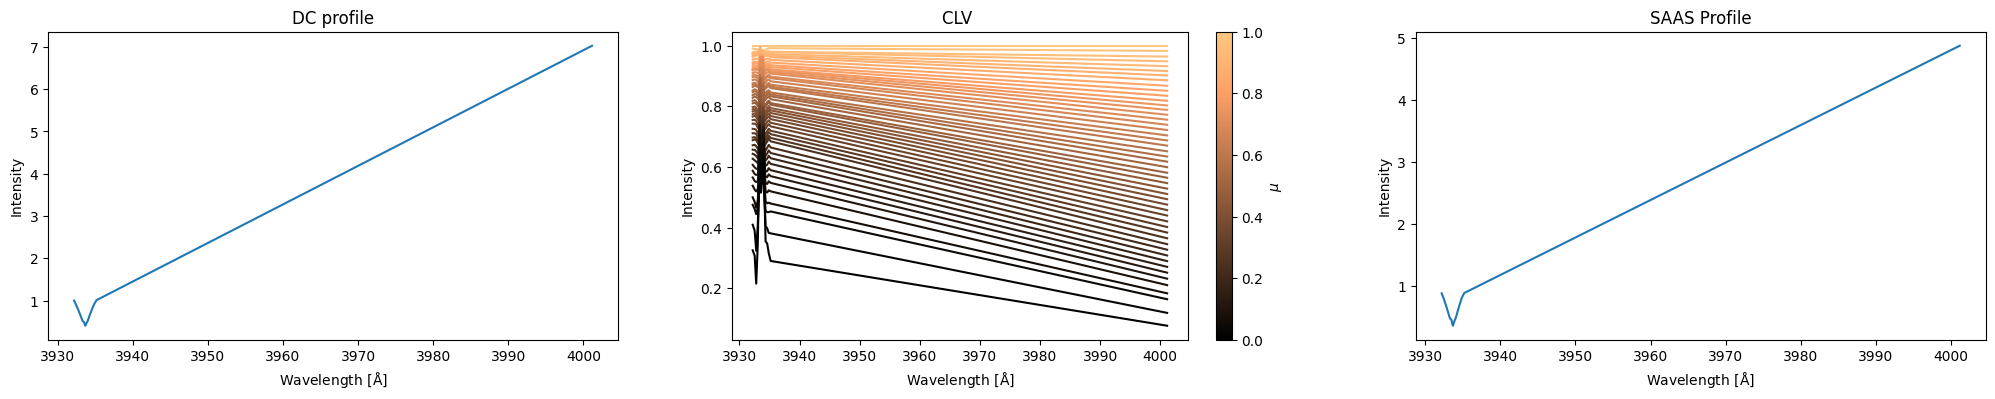

3933.7251200421415 [3932.19676006 3932.52204006 3932.78196005 3933.04188005 3933.10724005
 3933.17260005 3933.23796005 3933.30180005 3933.36716005 3933.43252005
 3933.49788004 3933.56172004 3933.62708004 3933.69244004 3933.75780004
 3933.82316004 3933.88700004 3933.95236004 3934.01772004 3934.08308004
 3934.14692004 3934.21228004 3934.27764004 3934.34300003 3934.60292003
 3934.86284003 3935.18812002 4001.14743998] [[1.         0.87620153 0.76842093 ... 0.91159718 1.00986771 7.02642874]
 [0.99070422 0.86673757 0.75995494 ... 0.90441404 1.00158354 6.90696614]
 [0.97648119 0.85636997 0.74948236 ... 0.89316074 0.98976455 6.77536039]
 ...
 [0.47531055 0.4044703  0.34149005 ... 0.41114552 0.45777378 1.1500991 ]
 [0.40946949 0.34169658 0.24846519 ... 0.34877113 0.38476981 0.83355861]
 [0.32502657 0.2695266  0.16539272 ... 0.28802065 0.29277341 0.53603683]]


In [13]:
reload(un)
import use_nessi3 as un3
theor_line = un3.linestudier('final_3934.npy', atlas=None, nr=101, neglect_atlas=True)
# theor_line.saas_profile_atlas_check(show_all=True)
print(np.median(theor_line.sst_wav), (theor_line.sst_wav), theor_line.sst_int)


## Calculating the mu !!!!! 

(453, 1, 28, 1236, 1888)
The frame is centered at (-716.921986496582, 186.15625469630433)


[-749.925986496582, -683.917986496582, 154.51385469630432, 217.79865469630434]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.631521890604457 for timeframe 0
succesfully saved.
The frame is centered at (-716.921986496582, 186.15625469630433)
[-749.925986496582, -683.917986496582, 154.51385469630432, 217.79865469630434]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.631521890604457 for timeframe 170
We take average mu to be  0.631521890604457
Mu also set to the theoretic nessi line.


(0.631521890604457, array([18], dtype=int64))

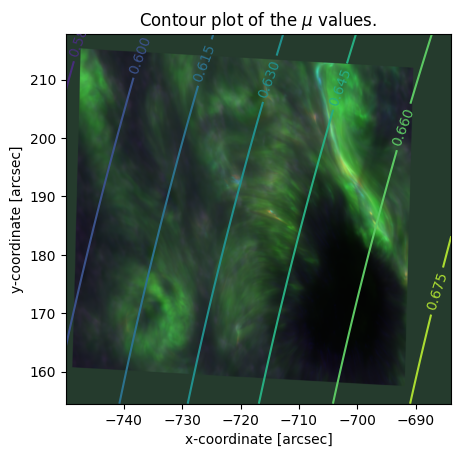

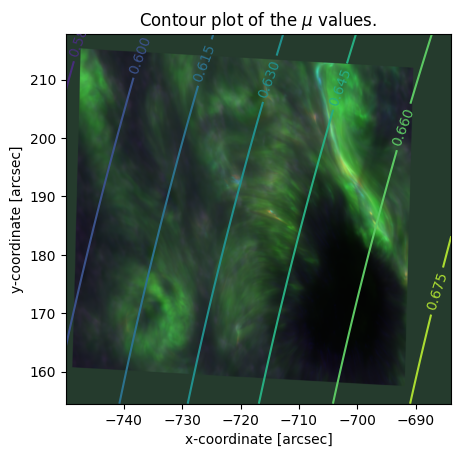

In [14]:
reload(un)
print(np.shape(CaK.datacube))
mu = CaK.set_mu(theor_line, number_of_last_frame=170, alternative_filename="fits/nb_8542_2019-05-06T08_33_15_scans=0-170_stokes_corrected_im.fits")
x = np.abs(theor_line.sst_mu-mu)
index_mu = np.where(x == np.min(x))[0]
mu, index_mu

In [15]:

theor_line.set_fov( CaK.xx, CaK.yy, CaK.boundary, sr=959.63)

MemoryError: Unable to allocate 498. MiB for an array with shape (2330445, 28) and data type float64

## Finding a suitable quiet sun patch
# In this case there doesn't realy exists a goed so we use the point at the continuum

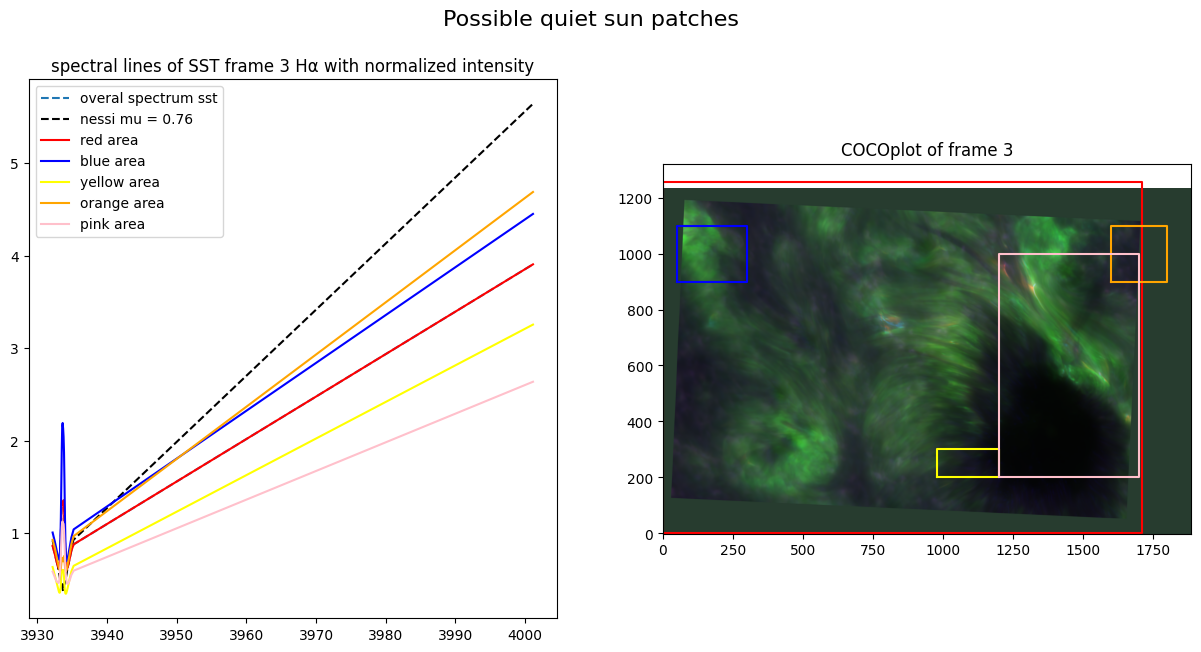

In [ ]:
X = [ [(0,1712), (0, 1257 ) ],[(50,300), (900, 1100)], [(980, 1200), (200, 300)] , [(1600, 1800), (900,1100) ], [(1200,1700), (200, 1000) ]]# max y: 1258, x: 1713
# %matplotlib widget
# %matplotlib inline
frame = 3

CaK.possible_quiet_sun_patches(frame, theor_line , X=X)


### Which quiet sun?

fill in here which color the wanted quiet sun patch had 

In [ ]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (1600, 1800) and ylim: (900, 1100)


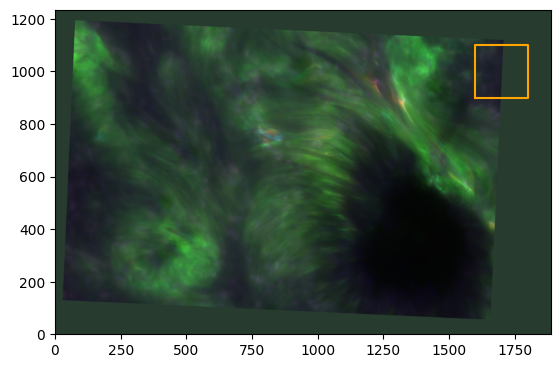

The quiet sun is pick at x (-690.4768100259939, 205.73098635622335) with average              mu 0.6605482402042397


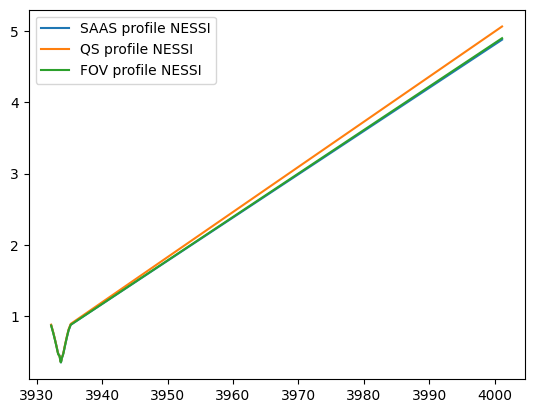

{'frame': 3, 'xlim': (1600, 1800), 'ylim': (900, 1100), 'color': 'orange'}

In [ ]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = colors.index(color_wanted_patch)

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_line.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaK.quiet_sun

the theta fit is  [0, 0, 0.9261836892286839]


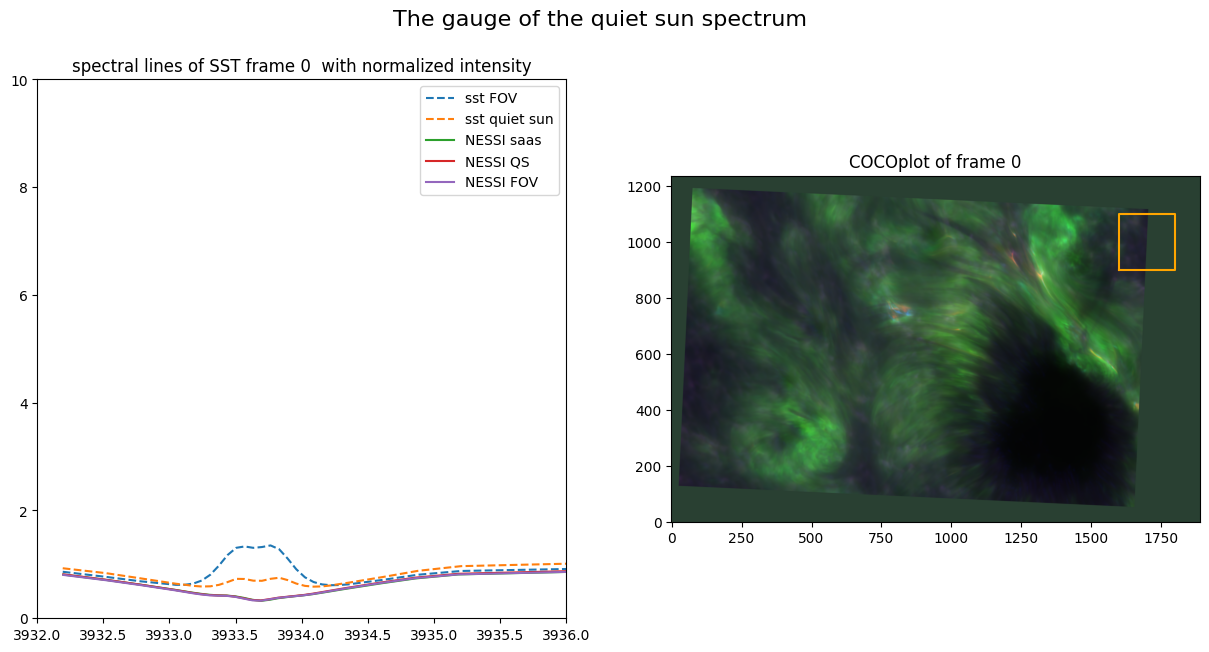

In [ ]:
reload(un3)
un3.fit_qs_to_NESSI_cont_point(theor_line, CaK, xshift=0)

In [ ]:
CaK.calculate__FOV_spect_over_time()
un.get_TIME(CaK)

array([ 0.        ,  0.13333333,  0.26666667,  0.4       ,  0.53333333,
        0.66666667,  0.8       ,  0.91666667,  1.05      ,  1.18333333,
        1.31666667,  1.45      ,  1.56666667,  1.7       ,  1.83333333,
        1.96666667,  2.1       ,  2.23333333,  2.36666667,  2.48333333,
        2.61666667,  2.75      ,  2.88333333,  3.01666667,  3.13333333,
        3.26666667,  3.4       ,  3.53333333,  3.66666667,  3.8       ,
        3.93333333,  4.05      ,  4.18333333,  4.31666667,  4.45      ,
        4.56666667,  4.7       ,  4.83333333,  4.96666667,  5.1       ,
        5.23333333,  5.35      ,  5.48333333,  5.61666667,  5.75      ,
        5.88333333,  6.        ,  6.13333333,  6.26666667,  6.4       ,
        6.51666667,  6.65      ,  6.78333333,  6.91666667,  7.05      ,
        7.18333333,  7.31666667,  7.43333333,  7.56666667,  7.7       ,
        7.83333333,  7.96666667,  8.1       ,  8.21666667,  8.35      ,
        8.48333333,  8.63333333,  8.75      ,  8.88333333,  9.01

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

lol
The peak occurs at frame [138] at time t=['08:52:07 UT.
The areafactor for this flare is 0.0010794811953836146 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 0.87%.


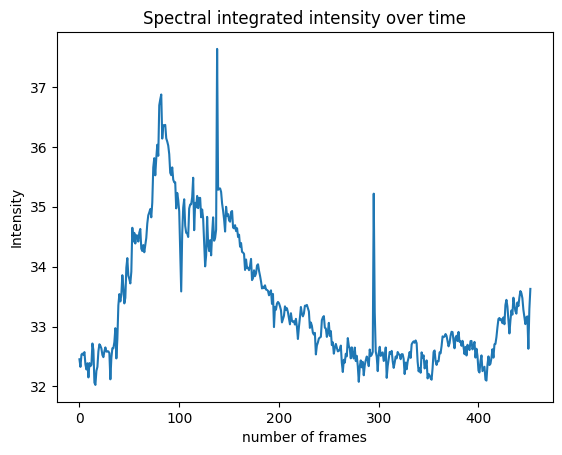

In [ ]:
un.save_for_further_analysis(CaK, theor_line)
